In [2]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string #additional tools to manipulate strings
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

ModuleNotFoundError: No module named 'nltk'

In [3]:
import spacy


In [4]:
sp = spacy.load('fr_core_news_sm')


OSError: [E050] Can't find model 'fr_core_news_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [7]:
sentence = sp(u" Le samedi matin, mon père qui est très sportif fait de la natation, et ma mère fait la cuisine parce que chaque samedi, mes parents invitent ma tante à dîner avec nous. Enfin, le dimanche d'habitude nous ne faisons pas grand-chose; quelques fois, mon père fait du bricolage si nécessaire.")


In [8]:
type(sentence)

spacy.tokens.doc.Doc

In [9]:
for word in sentence:
    print(word.text)

 
Le
samedi
matin
,
mon
père
qui
est
très
sportif
fait
de
la
natation
,
et
ma
mère
fait
la
cuisine
parce
que
chaque
samedi
,
mes
parents
invitent
ma
tante
à
dîner
avec
nous
.
Enfin
,
le
dimanche
d'
habitude
nous
ne
faisons
pas
grand-chose
;
quelques
fois
,
mon
père
fait
du
bricolage
si
nécessaire
.


In [10]:
for word in sentence:
    print(word.text,  word.lemma_)

   
Le le
samedi samedi
matin matin
, ,
mon mon
père père
qui qui
est être
très très
sportif sportif
fait faire
de de
la le
natation natation
, ,
et et
ma mon
mère mère
fait faire
la le
cuisine cuisine
parce parce
que que
chaque chaque
samedi samedi
, ,
mes mon
parents parent
invitent inviter
ma mon
tante tante
à à
dîner dîner
avec avec
nous nous
. .
Enfin enfin
, ,
le le
dimanche dimanche
d' de
habitude habitude
nous nous
ne ne
faisons faire
pas pas
grand-chose grand-chose
; ;
quelques quelque
fois fois
, ,
mon mon
père père
fait faire
du de
bricolage bricolage
si si
nécessaire nécessaire
. .


In [11]:
%cd C:\Users\HP\Desktop\NLP Project New
train  = pd.read_csv('NewTweets.csv',engine='python')

C:\Users\HP\Desktop\NLP Project New


In [12]:
train.head()

,sentiment,tweet_text
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?"
1,POSITIVE,",Oui, il est vraiment très lol"
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir."
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!"
4,POSITIVE,",Hey quoi de neuf et d'accueil"


In [13]:
train["sentiment"].value_counts()

POSITIVE    5000
NEGATIVE    5000
Name: sentiment, dtype: int64

In [14]:
count = train['tweet_text'].str.split().str.len()
count

0       10
1        6
2        9
3       17
4        6
        ..
9995    27
9996    17
9997    12
9998    22
9999     2
Name: tweet_text, Length: 10000, dtype: int64

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


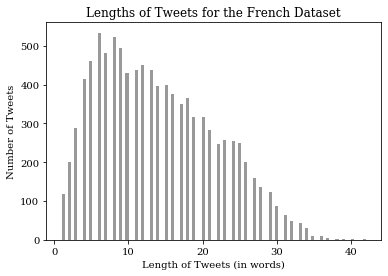

In [20]:

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "serif"
plt.hist(count, bins=100, normed=False,color='0.6')
csfont = {'fontname':'Serif'}
plt.xlabel('Length of Tweets (in words)',**csfont)
plt.ylabel('Number of Tweets',**csfont)

plt.title('Lengths of Tweets for the French Dataset',**csfont)

plt.savefig('filename.png', dpi=300)
plt.show()


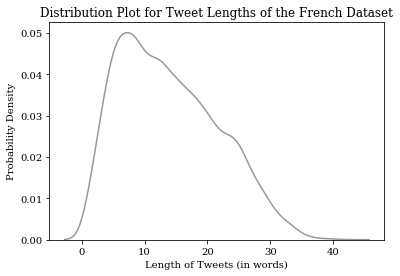

In [19]:
import seaborn as sns
plt.rcParams['font.family'] = "serif"
sns.distplot(count,color='0.6',hist=False)
csfont = {'fontname':'Serif'}
plt.xlabel('Length of Tweets (in words)',**csfont)
plt.ylabel('Probability Density',**csfont)

plt.title('Distribution Plot for Tweet Lengths of the French Dataset',**csfont)

plt.savefig('filename.png', dpi=300)
plt.show()


In [42]:
train['Count'] = count

In [43]:
train.to_csv("FrenchwCount.csv")

# Function to remove any pattern

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

# Removing User Handles

In [13]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tweet_text'], "@[\w]*") 
train.head()

,sentiment,tweet_text,tidy_tweet
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?",",- Tu es si adorable! Où as-tu eu cette chemise?"
1,POSITIVE,",Oui, il est vraiment très lol",",Oui, il est vraiment très lol"
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir.",",- Thé vert, une boisson pour me faire plaisir."
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!",",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!"
4,POSITIVE,",Hey quoi de neuf et d'accueil",",Hey quoi de neuf et d'accueil"


# Removing Hashtags

In [14]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tidy_tweet'], "#[\w]*") 
train.head()

,sentiment,tweet_text,tidy_tweet
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?",",- Tu es si adorable! Où as-tu eu cette chemise?"
1,POSITIVE,",Oui, il est vraiment très lol",",Oui, il est vraiment très lol"
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir.",",- Thé vert, une boisson pour me faire plaisir."
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!",",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!"
4,POSITIVE,",Hey quoi de neuf et d'accueil",",Hey quoi de neuf et d'accueil"


# Removing Web Addresses

In [15]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("(\w+:\/\/\S+)", " ")
train.head()

,sentiment,tweet_text,tidy_tweet
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?",",- Tu es si adorable! Où as-tu eu cette chemise?"
1,POSITIVE,",Oui, il est vraiment très lol",",Oui, il est vraiment très lol"
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir.",",- Thé vert, une boisson pour me faire plaisir."
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!",",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!"
4,POSITIVE,",Hey quoi de neuf et d'accueil",",Hey quoi de neuf et d'accueil"


# Removing Punctuations & Special Characters

In [16]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[\.\,\!\?\:\;\-\=*$%^&(){}~<>€|\"]", " ")
train.head()

,sentiment,tweet_text,tidy_tweet
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?",Tu es si adorable Où as tu eu cette chemise
1,POSITIVE,",Oui, il est vraiment très lol",Oui il est vraiment très lol
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir.",Thé vert une boisson pour me faire plaisir
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas Oops Parlez en
4,POSITIVE,",Hey quoi de neuf et d'accueil",Hey quoi de neuf et d'accueil


# Removing Quotes

In [17]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace('"', '')
train.tail()

,sentiment,tweet_text,tidy_tweet
9995,NEGATIVE,",C'était une excellente idée, je l'ai invitée au marché de Queen Vic avec moi le vendredi. Cela s'est avéré que c'était bon vendredi et qu'il était fermé.",C'était une excellente idée je l'ai invitée au marché de Queen Vic avec moi le vendredi Cela s'est avéré que c'était bon vendredi et qu'il était fermé
9996,NEGATIVE,",En espérant que mon chien s'améliore mieux !!! Elle devait aller au chien de bière hier soir",En espérant que mon chien s'améliore mieux Elle devait aller au chien de bière hier soir
9997,NEGATIVE,",Étude d'étude. Il semble être sans fin. Des tests tout le temps.",Étude d'étude Il semble être sans fin Des tests tout le temps
9998,NEGATIVE,",Oui, je sais qu'ils se rendent bientôt aux États-Unis, mais je ne pouvais pas y aller, c'est pendant la semaine en philly",Oui je sais qu'ils se rendent bientôt aux États Unis mais je ne pouvais pas y aller c'est pendant la semaine en philly
9999,NEGATIVE,",vomir. Urgh",vomir Urgh


# Removing Numbers

In [18]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("^\d+\s|\s\d+\s|\s\d+$", " ")
train.tail()


,sentiment,tweet_text,tidy_tweet
9995,NEGATIVE,",C'était une excellente idée, je l'ai invitée au marché de Queen Vic avec moi le vendredi. Cela s'est avéré que c'était bon vendredi et qu'il était fermé.",C'était une excellente idée je l'ai invitée au marché de Queen Vic avec moi le vendredi Cela s'est avéré que c'était bon vendredi et qu'il était fermé
9996,NEGATIVE,",En espérant que mon chien s'améliore mieux !!! Elle devait aller au chien de bière hier soir",En espérant que mon chien s'améliore mieux Elle devait aller au chien de bière hier soir
9997,NEGATIVE,",Étude d'étude. Il semble être sans fin. Des tests tout le temps.",Étude d'étude Il semble être sans fin Des tests tout le temps
9998,NEGATIVE,",Oui, je sais qu'ils se rendent bientôt aux États-Unis, mais je ne pouvais pas y aller, c'est pendant la semaine en philly",Oui je sais qu'ils se rendent bientôt aux États Unis mais je ne pouvais pas y aller c'est pendant la semaine en philly
9999,NEGATIVE,",vomir. Urgh",vomir Urgh


# Converting to Lower Case

In [19]:
train['tidy_tweet']=train['tidy_tweet'].str.lower()
train.head()

,sentiment,tweet_text,tidy_tweet
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?",tu es si adorable où as tu eu cette chemise
1,POSITIVE,",Oui, il est vraiment très lol",oui il est vraiment très lol
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir.",thé vert une boisson pour me faire plaisir
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!",je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas oops parlez en
4,POSITIVE,",Hey quoi de neuf et d'accueil",hey quoi de neuf et d'accueil


# Lemmatization

In [20]:
train['tidy_tweet']=train['tidy_tweet'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
train.head()

,sentiment,tweet_text,tidy_tweet
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?",tu es si adorable où as tu avoir ce chemise
1,POSITIVE,",Oui, il est vraiment très lol",oui il être vraiment très lol
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir.",thé vert un boisson pour me faire plaisir
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!",je parler de ne pas savoir comment épeler un mot et mal orthographier un tas oops parler en
4,POSITIVE,",Hey quoi de neuf et d'accueil",hey quoi de neuf et de accueil


In [21]:
count = train['tidy_tweet'].str.split().str.len()


In [22]:
train=train[~(count==1)]


train.shape


(9925, 3)

In [23]:
train.head()

,sentiment,tweet_text,tidy_tweet
0,POSITIVE,",- Tu es si adorable! Où as-tu eu cette chemise?",tu es si adorable où as tu avoir ce chemise
1,POSITIVE,",Oui, il est vraiment très lol",oui il être vraiment très lol
2,POSITIVE,",- Thé vert, une boisson pour me faire plaisir.",thé vert un boisson pour me faire plaisir
3,POSITIVE,",Je parlais de ne pas savoir comment épeler un mot et mal orthographié un tas! Oops! Parlez-en!",je parler de ne pas savoir comment épeler un mot et mal orthographier un tas oops parler en
4,POSITIVE,",Hey quoi de neuf et d'accueil",hey quoi de neuf et de accueil


In [24]:
train = train.reset_index()


In [25]:
train["sentiment"].value_counts()

NEGATIVE    4984
POSITIVE    4941
Name: sentiment, dtype: int64

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

# Unigrams

In [232]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000,ngram_range=(1,1))
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf.shape

(9925, 3000)

In [233]:
A=tfidf
y=train['sentiment']
A = pd.DataFrame(A.toarray())
A.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.186291,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Bigrams

In [234]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000,ngram_range=(2,2))
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf.shape

(9925, 3000)

In [235]:
B=tfidf
y=train['sentiment']
B = pd.DataFrame(B.toarray())
B.head()


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.439918,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Unigrams+Bigrams

In [236]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000,ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf.shape

(9925, 3000)

In [237]:
C=tfidf
y=train['sentiment']
C = pd.DataFrame(C.toarray())
C.shape


(9925, 3000)

# Trigrams

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000,ngram_range=(3,3))
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf.shape

(9925, 3000)

In [28]:
D=tfidf
y=train['sentiment']
D = pd.DataFrame(D.toarray())
D.shape

(9925, 3000)

# Uni+Bi+Trigrams

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000,ngram_range=(1,3))
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf.shape

(9925, 3000)

In [33]:
E=tfidf
y=train['sentiment']
E = pd.DataFrame(E.toarray())
E.shape

(9925, 3000)

# Unigrams

Logistic Regression

In [238]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(A,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = A.loc[train_index],A.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model =  LogisticRegression()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1



1 of kfold 5
accuracy_score 0.74911838790932
              precision    recall  f1-score   support

    POSITIVE       0.75      0.74      0.75       996
    NEGATIVE       0.74      0.76      0.75       989

    accuracy                           0.75      1985
   macro avg       0.75      0.75      0.75      1985
weighted avg       0.75      0.75      0.75      1985


2 of kfold 5
accuracy_score 0.7314861460957179
              precision    recall  f1-score   support

    POSITIVE       0.74      0.72      0.73       997
    NEGATIVE       0.72      0.74      0.73       988

    accuracy                           0.73      1985
   macro avg       0.73      0.73      0.73      1985
weighted avg       0.73      0.73      0.73      1985


3 of kfold 5
accuracy_score 0.7370277078085642
              precision    recall  f1-score   support

    POSITIVE       0.74      0.74      0.74       997
    NEGATIVE       0.74      0.74      0.74       988

    accuracy                           0

Naive Bayes

In [239]:
from sklearn.naive_bayes import BernoulliNB

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(A,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = A.loc[train_index],A.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = BernoulliNB()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1 
    




1 of kfold 5
accuracy_score 0.7370277078085642
              precision    recall  f1-score   support

    POSITIVE       0.75      0.72      0.73       996
    NEGATIVE       0.73      0.76      0.74       989

    accuracy                           0.74      1985
   macro avg       0.74      0.74      0.74      1985
weighted avg       0.74      0.74      0.74      1985


2 of kfold 5
accuracy_score 0.7178841309823678
              precision    recall  f1-score   support

    POSITIVE       0.73      0.69      0.71       997
    NEGATIVE       0.71      0.74      0.72       988

    accuracy                           0.72      1985
   macro avg       0.72      0.72      0.72      1985
weighted avg       0.72      0.72      0.72      1985


3 of kfold 5
accuracy_score 0.7445843828715365
              precision    recall  f1-score   support

    POSITIVE       0.76      0.72      0.74       997
    NEGATIVE       0.73      0.77      0.75       988

    accuracy                          

In [240]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(A,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = A.loc[train_index],A.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = SGDClassifier(loss='log',penalty='elasticnet')
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1
    
    




1 of kfold 5
accuracy_score 0.74911838790932
              precision    recall  f1-score   support

    POSITIVE       0.78      0.70      0.74       996
    NEGATIVE       0.73      0.80      0.76       989

    accuracy                           0.75      1985
   macro avg       0.75      0.75      0.75      1985
weighted avg       0.75      0.75      0.75      1985


2 of kfold 5
accuracy_score 0.7329974811083123
              precision    recall  f1-score   support

    POSITIVE       0.72      0.76      0.74       997
    NEGATIVE       0.74      0.71      0.73       988

    accuracy                           0.73      1985
   macro avg       0.73      0.73      0.73      1985
weighted avg       0.73      0.73      0.73      1985


3 of kfold 5
accuracy_score 0.7224181360201511
              precision    recall  f1-score   support

    POSITIVE       0.68      0.85      0.76       997
    NEGATIVE       0.80      0.59      0.68       988

    accuracy                           0

# Bigrams

Logistic Regression

In [241]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(B,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = B.loc[train_index],B.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model =  LogisticRegression()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1



1 of kfold 5
accuracy_score 0.6962216624685138
              precision    recall  f1-score   support

    POSITIVE       0.71      0.67      0.69       996
    NEGATIVE       0.69      0.72      0.70       989

    accuracy                           0.70      1985
   macro avg       0.70      0.70      0.70      1985
weighted avg       0.70      0.70      0.70      1985


2 of kfold 5
accuracy_score 0.6886649874055416
              precision    recall  f1-score   support

    POSITIVE       0.71      0.65      0.68       997
    NEGATIVE       0.67      0.72      0.70       988

    accuracy                           0.69      1985
   macro avg       0.69      0.69      0.69      1985
weighted avg       0.69      0.69      0.69      1985


3 of kfold 5
accuracy_score 0.6806045340050377
              precision    recall  f1-score   support

    POSITIVE       0.70      0.64      0.67       997
    NEGATIVE       0.66      0.72      0.69       988

    accuracy                          

Naive Bayes

In [242]:
from sklearn.naive_bayes import BernoulliNB

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(B,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = B.loc[train_index],B.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = BernoulliNB()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1 
    




1 of kfold 5
accuracy_score 0.6982367758186397
              precision    recall  f1-score   support

    POSITIVE       0.74      0.62      0.67       996
    NEGATIVE       0.67      0.77      0.72       989

    accuracy                           0.70      1985
   macro avg       0.70      0.70      0.70      1985
weighted avg       0.70      0.70      0.70      1985


2 of kfold 5
accuracy_score 0.6801007556675063
              precision    recall  f1-score   support

    POSITIVE       0.72      0.60      0.65       997
    NEGATIVE       0.65      0.76      0.70       988

    accuracy                           0.68      1985
   macro avg       0.69      0.68      0.68      1985
weighted avg       0.69      0.68      0.68      1985


3 of kfold 5
accuracy_score 0.6780856423173803
              precision    recall  f1-score   support

    POSITIVE       0.71      0.60      0.65       997
    NEGATIVE       0.65      0.76      0.70       988

    accuracy                          

SGD

In [243]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(B,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = B.loc[train_index],B.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = SGDClassifier(loss='log',penalty='elasticnet')
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1
    
    




1 of kfold 5
accuracy_score 0.690176322418136
              precision    recall  f1-score   support

    POSITIVE       0.76      0.56      0.64       996
    NEGATIVE       0.65      0.83      0.73       989

    accuracy                           0.69      1985
   macro avg       0.71      0.69      0.68      1985
weighted avg       0.71      0.69      0.68      1985


2 of kfold 5
accuracy_score 0.68816120906801
              precision    recall  f1-score   support

    POSITIVE       0.73      0.61      0.66       997
    NEGATIVE       0.66      0.77      0.71       988

    accuracy                           0.69      1985
   macro avg       0.69      0.69      0.69      1985
weighted avg       0.69      0.69      0.69      1985


3 of kfold 5
accuracy_score 0.672544080604534
              precision    recall  f1-score   support

    POSITIVE       0.70      0.61      0.65       997
    NEGATIVE       0.65      0.73      0.69       988

    accuracy                           0.6

# Unigrams + Bigrams

Logistic Regression

In [244]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(C,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = C.loc[train_index],C.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model =  LogisticRegression()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1



1 of kfold 5
accuracy_score 0.747103274559194
              precision    recall  f1-score   support

    POSITIVE       0.75      0.74      0.75       996
    NEGATIVE       0.74      0.76      0.75       989

    accuracy                           0.75      1985
   macro avg       0.75      0.75      0.75      1985
weighted avg       0.75      0.75      0.75      1985


2 of kfold 5
accuracy_score 0.7324937027707809
              precision    recall  f1-score   support

    POSITIVE       0.73      0.73      0.73       997
    NEGATIVE       0.73      0.73      0.73       988

    accuracy                           0.73      1985
   macro avg       0.73      0.73      0.73      1985
weighted avg       0.73      0.73      0.73      1985


3 of kfold 5
accuracy_score 0.7375314861460958
              precision    recall  f1-score   support

    POSITIVE       0.74      0.74      0.74       997
    NEGATIVE       0.74      0.74      0.74       988

    accuracy                           

Naive Bayes

In [245]:
from sklearn.naive_bayes import BernoulliNB

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(C,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = C.loc[train_index],C.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = BernoulliNB()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1 
    




1 of kfold 5
accuracy_score 0.7289672544080604
              precision    recall  f1-score   support

    POSITIVE       0.76      0.67      0.71       996
    NEGATIVE       0.70      0.79      0.74       989

    accuracy                           0.73      1985
   macro avg       0.73      0.73      0.73      1985
weighted avg       0.73      0.73      0.73      1985


2 of kfold 5
accuracy_score 0.7138539042821158
              precision    recall  f1-score   support

    POSITIVE       0.75      0.65      0.69       997
    NEGATIVE       0.69      0.78      0.73       988

    accuracy                           0.71      1985
   macro avg       0.72      0.71      0.71      1985
weighted avg       0.72      0.71      0.71      1985


3 of kfold 5
accuracy_score 0.7113350125944584
              precision    recall  f1-score   support

    POSITIVE       0.74      0.66      0.70       997
    NEGATIVE       0.69      0.76      0.72       988

    accuracy                          

SGD

In [246]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(C,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = C.loc[train_index],C.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = SGDClassifier(loss='log',penalty='elasticnet')
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1
    
    




1 of kfold 5
accuracy_score 0.7465994962216624
              precision    recall  f1-score   support

    POSITIVE       0.75      0.73      0.74       996
    NEGATIVE       0.74      0.76      0.75       989

    accuracy                           0.75      1985
   macro avg       0.75      0.75      0.75      1985
weighted avg       0.75      0.75      0.75      1985


2 of kfold 5
accuracy_score 0.7299748110831235
              precision    recall  f1-score   support

    POSITIVE       0.73      0.74      0.73       997
    NEGATIVE       0.73      0.72      0.73       988

    accuracy                           0.73      1985
   macro avg       0.73      0.73      0.73      1985
weighted avg       0.73      0.73      0.73      1985


3 of kfold 5
accuracy_score 0.7385390428211587
              precision    recall  f1-score   support

    POSITIVE       0.76      0.71      0.73       997
    NEGATIVE       0.72      0.77      0.75       988

    accuracy                          

# Trigrams

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(D,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = D.loc[train_index],D.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model =  LogisticRegression()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1



1 of kfold 5
accuracy_score 0.6458438287153653
              precision    recall  f1-score   support

    POSITIVE       0.70      0.52      0.60       996
    NEGATIVE       0.61      0.77      0.69       989

    accuracy                           0.65      1985
   macro avg       0.66      0.65      0.64      1985
weighted avg       0.66      0.65      0.64      1985


2 of kfold 5
accuracy_score 0.6408060453400504
              precision    recall  f1-score   support

    POSITIVE       0.69      0.53      0.60       997
    NEGATIVE       0.61      0.76      0.68       988

    accuracy                           0.64      1985
   macro avg       0.65      0.64      0.64      1985
weighted avg       0.65      0.64      0.64      1985


3 of kfold 5
accuracy_score 0.6267002518891688
              precision    recall  f1-score   support

    POSITIVE       0.66      0.52      0.58       997
    NEGATIVE       0.60      0.73      0.66       988

    accuracy                          

In [30]:
from sklearn.naive_bayes import BernoulliNB

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(D,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = D.loc[train_index],D.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = BernoulliNB()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1 
    




1 of kfold 5
accuracy_score 0.6513853904282116
              precision    recall  f1-score   support

    POSITIVE       0.72      0.50      0.59       996
    NEGATIVE       0.61      0.81      0.70       989

    accuracy                           0.65      1985
   macro avg       0.67      0.65      0.64      1985
weighted avg       0.67      0.65      0.64      1985


2 of kfold 5
accuracy_score 0.6392947103274559
              precision    recall  f1-score   support

    POSITIVE       0.71      0.48      0.57       997
    NEGATIVE       0.60      0.80      0.69       988

    accuracy                           0.64      1985
   macro avg       0.65      0.64      0.63      1985
weighted avg       0.66      0.64      0.63      1985


3 of kfold 5
accuracy_score 0.6287153652392947
              precision    recall  f1-score   support

    POSITIVE       0.68      0.49      0.57       997
    NEGATIVE       0.60      0.76      0.67       988

    accuracy                          

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(D,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = D.loc[train_index],D.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = SGDClassifier(loss='log',penalty='elasticnet')
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1
    
    




1 of kfold 5
accuracy_score 0.5994962216624685
              precision    recall  f1-score   support

    POSITIVE       0.57      0.86      0.68       996
    NEGATIVE       0.70      0.34      0.46       989

    accuracy                           0.60      1985
   macro avg       0.64      0.60      0.57      1985
weighted avg       0.64      0.60      0.57      1985


2 of kfold 5
accuracy_score 0.6438287153652393
              precision    recall  f1-score   support

    POSITIVE       0.68      0.54      0.60       997
    NEGATIVE       0.62      0.75      0.68       988

    accuracy                           0.64      1985
   macro avg       0.65      0.64      0.64      1985
weighted avg       0.65      0.64      0.64      1985


3 of kfold 5
accuracy_score 0.6045340050377834
              precision    recall  f1-score   support

    POSITIVE       0.72      0.35      0.47       997
    NEGATIVE       0.57      0.86      0.69       988

    accuracy                          

# Uni+Bi+Trigrams

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(E,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = E.loc[train_index],E.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model =  LogisticRegression()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1



1 of kfold 5
accuracy_score 0.7395465994962217
              precision    recall  f1-score   support

    POSITIVE       0.75      0.73      0.74       996
    NEGATIVE       0.73      0.75      0.74       989

    accuracy                           0.74      1985
   macro avg       0.74      0.74      0.74      1985
weighted avg       0.74      0.74      0.74      1985


2 of kfold 5
accuracy_score 0.7269521410579345
              precision    recall  f1-score   support

    POSITIVE       0.73      0.74      0.73       997
    NEGATIVE       0.73      0.72      0.72       988

    accuracy                           0.73      1985
   macro avg       0.73      0.73      0.73      1985
weighted avg       0.73      0.73      0.73      1985


3 of kfold 5
accuracy_score 0.7314861460957179
              precision    recall  f1-score   support

    POSITIVE       0.73      0.73      0.73       997
    NEGATIVE       0.73      0.73      0.73       988

    accuracy                          

In [35]:
from sklearn.naive_bayes import BernoulliNB

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(E,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = E.loc[train_index],E.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = BernoulliNB()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1 
    




1 of kfold 5
accuracy_score 0.7229219143576826
              precision    recall  f1-score   support

    POSITIVE       0.77      0.64      0.70       996
    NEGATIVE       0.69      0.81      0.74       989

    accuracy                           0.72      1985
   macro avg       0.73      0.72      0.72      1985
weighted avg       0.73      0.72      0.72      1985


2 of kfold 5
accuracy_score 0.691183879093199
              precision    recall  f1-score   support

    POSITIVE       0.73      0.61      0.67       997
    NEGATIVE       0.66      0.77      0.71       988

    accuracy                           0.69      1985
   macro avg       0.70      0.69      0.69      1985
weighted avg       0.70      0.69      0.69      1985


3 of kfold 5
accuracy_score 0.7002518891687658
              precision    recall  f1-score   support

    POSITIVE       0.73      0.63      0.68       997
    NEGATIVE       0.68      0.77      0.72       988

    accuracy                           

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(E,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = E.loc[train_index],E.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     #sm=SMOTE(random_state=1)
     #xtr,ytr=sm.fit_sample(xtr,ytr)
     model = SGDClassifier(loss='log',penalty='elasticnet')
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     target_names = ['POSITIVE','NEGATIVE']
     print(classification_report(yvl, pred_test, target_names=target_names))
     i+=1
    
    




1 of kfold 5
accuracy_score 0.7324937027707809
              precision    recall  f1-score   support

    POSITIVE       0.71      0.80      0.75       996
    NEGATIVE       0.77      0.67      0.71       989

    accuracy                           0.73      1985
   macro avg       0.74      0.73      0.73      1985
weighted avg       0.74      0.73      0.73      1985


2 of kfold 5
accuracy_score 0.7274559193954659
              precision    recall  f1-score   support

    POSITIVE       0.76      0.68      0.71       997
    NEGATIVE       0.70      0.78      0.74       988

    accuracy                           0.73      1985
   macro avg       0.73      0.73      0.73      1985
weighted avg       0.73      0.73      0.73      1985


3 of kfold 5
accuracy_score 0.7340050377833753
              precision    recall  f1-score   support

    POSITIVE       0.71      0.81      0.75       997
    NEGATIVE       0.77      0.66      0.71       988

    accuracy                          